<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BRL2%5DQ_Learning_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class Agent():
  def __init__(self, lr, gamma, n_actions, n_states, eps_start, eps_end, eps_dec):
    self.lr = lr
    self.gamma = gamma
    self.n_actions = n_actions
    self.n_states = n_states
    self.epsilon = eps_start
    self.eps_min = eps_end
    self.eps_dec = eps_dec

    self.Q = {}

    self.init_Q()

  def init_Q(self):
    for state in range(self.n_states):
      for action in range(self.n_actions):
        self.Q[(state, action)] = 0.0

  
  def choose_action(self, state):
    if np.random.random() < self.epsilon:
      action = np.random.choice([i for i in range(self.n_actions)])
    else:
      actions = np.array([self.Q[(state, a)] for a in range(self.n_actions)])
      action = np.argmax(actions)
    return action

  def decrement_epsilon(self):
    self.epsilon = self.epsilon*self.eps_dec if self.epsilon>self.eps_min \
                    else self.eps_min

  def learn(self, state, action, reward, state_):
    actions = np.array([self.Q[state_, a] for a in range(self.n_actions)])
    a_max = np.argmax(actions)

    self.Q[(state, action)] += self.lr*(reward + 
                                        self.gamma*self.Q[(state_, a_max)]-
                                        self.Q[(state, action)])
    
    self.decrement_epsilon()

In [ ]:
import gym
import matplotlib.pyplot as plt

Epsisode:  0 win pct 0.00 epsilon 1.00
Epsisode:  5000 win pct 0.01 epsilon 0.98
Epsisode:  10000 win pct 0.01 epsilon 0.96
Epsisode:  15000 win pct 0.02 epsilon 0.94
Epsisode:  20000 win pct 0.02 epsilon 0.92
Epsisode:  25000 win pct 0.01 epsilon 0.91
Epsisode:  30000 win pct 0.03 epsilon 0.89
Epsisode:  35000 win pct 0.01 epsilon 0.87
Epsisode:  40000 win pct 0.02 epsilon 0.85
Epsisode:  45000 win pct 0.03 epsilon 0.84
Epsisode:  50000 win pct 0.04 epsilon 0.82
Epsisode:  55000 win pct 0.03 epsilon 0.80
Epsisode:  60000 win pct 0.01 epsilon 0.78
Epsisode:  65000 win pct 0.00 epsilon 0.77
Epsisode:  70000 win pct 0.02 epsilon 0.75
Epsisode:  75000 win pct 0.05 epsilon 0.73
Epsisode:  80000 win pct 0.01 epsilon 0.72
Epsisode:  85000 win pct 0.02 epsilon 0.70
Epsisode:  90000 win pct 0.06 epsilon 0.68
Epsisode:  95000 win pct 0.04 epsilon 0.67
Epsisode:  100000 win pct 0.04 epsilon 0.65
Epsisode:  105000 win pct 0.04 epsilon 0.64
Epsisode:  110000 win pct 0.02 epsilon 0.62
Epsisode:  11

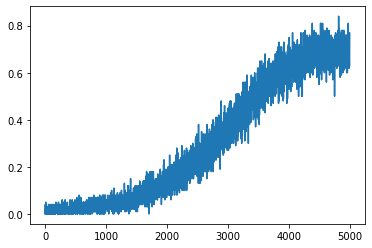

In [ ]:
if __name__ == '__main__':
  env = gym.make('FrozenLake-v0')
  agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01, 
                eps_dec=0.9999995, n_actions=4, n_states=16)
  scores = []
  win_pct_list = []
  n_games = 500000

  for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
      action = agent.choose_action(observation)
      observation_, reward, done, info = env.step(action)
      agent.learn(observation, action, reward, observation_)
      score += reward
      observation = observation_
    scores.append(score)
    if i%100 == 0:
      win_pct = np.mean(scores[-100:])
      win_pct_list.append(win_pct)
      if i % 5000 == 0:
        print('Epsisode: ', i, 'win pct %.2f'%win_pct, 'epsilon %.2f' % agent.epsilon)

  plt.plot(win_pct_list)
  plt.show()

Epsisode:  0 win pct 0.00 epsilon 1.00
Epsisode:  5000 win pct 0.03 epsilon 0.83
Epsisode:  10000 win pct 0.04 epsilon 0.70
Epsisode:  15000 win pct 0.01 epsilon 0.59
Epsisode:  20000 win pct 0.01 epsilon 0.51
Epsisode:  25000 win pct 0.01 epsilon 0.43
Epsisode:  30000 win pct 0.03 epsilon 0.37
Epsisode:  35000 win pct 0.05 epsilon 0.32
Epsisode:  40000 win pct 0.07 epsilon 0.28
Epsisode:  45000 win pct 0.05 epsilon 0.24
Epsisode:  50000 win pct 0.01 epsilon 0.21
Epsisode:  55000 win pct 0.06 epsilon 0.18
Epsisode:  60000 win pct 0.03 epsilon 0.16
Epsisode:  65000 win pct 0.06 epsilon 0.14
Epsisode:  70000 win pct 0.06 epsilon 0.12
Epsisode:  75000 win pct 0.00 epsilon 0.10
Epsisode:  80000 win pct 0.03 epsilon 0.09
Epsisode:  85000 win pct 0.03 epsilon 0.08
Epsisode:  90000 win pct 0.06 epsilon 0.07
Epsisode:  95000 win pct 0.04 epsilon 0.06
Epsisode:  100000 win pct 0.04 epsilon 0.05
Epsisode:  105000 win pct 0.00 epsilon 0.05
Epsisode:  110000 win pct 0.10 epsilon 0.04
Epsisode:  11

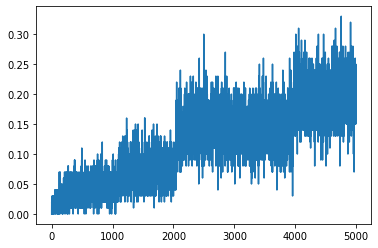

In [ ]:
if __name__ == '__main__':
  env = gym.make('FrozenLake-v0')
  agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01, 
                eps_dec=0.999995, n_actions=4, n_states=16)
  scores = []
  win_pct_list = []
  n_games = 500000

  for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
      action = agent.choose_action(observation)
      observation_, reward, done, info = env.step(action)
      agent.learn(observation, action, reward, observation_)
      score += reward
      observation = observation_
    scores.append(score)
    if i%100 == 0:
      win_pct = np.mean(scores[-100:])
      win_pct_list.append(win_pct)
      if i % 5000 == 0:
        print('Epsisode: ', i, 'win pct %.2f'%win_pct, 'epsilon %.2f' % agent.epsilon)

  plt.plot(win_pct_list)
  plt.show()

Epsisode:  0 win pct 0.00 epsilon 1.00
Epsisode:  5000 win pct 0.02 epsilon 1.00
Epsisode:  10000 win pct 0.03 epsilon 1.00
Epsisode:  15000 win pct 0.01 epsilon 1.00
Epsisode:  20000 win pct 0.01 epsilon 1.00
Epsisode:  25000 win pct 0.01 epsilon 1.00
Epsisode:  30000 win pct 0.02 epsilon 1.00
Epsisode:  35000 win pct 0.00 epsilon 1.00
Epsisode:  40000 win pct 0.01 epsilon 1.00
Epsisode:  45000 win pct 0.01 epsilon 1.00
Epsisode:  50000 win pct 0.01 epsilon 1.00
Epsisode:  55000 win pct 0.01 epsilon 1.00
Epsisode:  60000 win pct 0.00 epsilon 1.00
Epsisode:  65000 win pct 0.02 epsilon 1.00
Epsisode:  70000 win pct 0.02 epsilon 1.00
Epsisode:  75000 win pct 0.02 epsilon 1.00
Epsisode:  80000 win pct 0.03 epsilon 1.00
Epsisode:  85000 win pct 0.03 epsilon 1.00
Epsisode:  90000 win pct 0.00 epsilon 1.00
Epsisode:  95000 win pct 0.00 epsilon 1.00
Epsisode:  100000 win pct 0.01 epsilon 1.00
Epsisode:  105000 win pct 0.03 epsilon 1.00
Epsisode:  110000 win pct 0.03 epsilon 1.00
Epsisode:  11

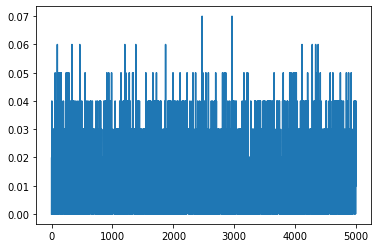

In [ ]:
if __name__ == '__main__':
  env = gym.make('FrozenLake-v0')
  agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01, 
                eps_dec=0.999999995, n_actions=4, n_states=16)
  scores = []
  win_pct_list = []
  n_games = 500000

  for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
      action = agent.choose_action(observation)
      observation_, reward, done, info = env.step(action)
      agent.learn(observation, action, reward, observation_)
      score += reward
      observation = observation_
    scores.append(score)
    if i%100 == 0:
      win_pct = np.mean(scores[-100:])
      win_pct_list.append(win_pct)
      if i % 5000 == 0:
        print('Epsisode: ', i, 'win pct %.2f'%win_pct, 'epsilon %.2f' % agent.epsilon)

  plt.plot(win_pct_list)
  plt.show()